In [1]:
from IPython.display import display, HTML
display(HTML(""))
import lazy_pipeline as lpipe
from platform import python_version
import sklearn
from importlib import reload
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from datetime import datetime
from sklearn.linear_model import LogisticRegression
import copy
#Let's dive in doing the ML model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,plot_roc_curve,classification_report
print(python_version())
print(lpipe.pd.__version__)
print(sklearn.__version__)

3.8.8
1.2.4
0.24.1


Loading Data

In [2]:

column_names = ['Sample code number','Clump Thickness','Uniformity of Cell Size',
        'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
        'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data = 'breast-cancer-wisconsin.data'
df = pd.read_csv(data, names=column_names)
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
df.dtypes #checking the datatypes of the features

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

Our dataset contains 10 int data and 1 object data.

In [4]:
df.isnull().values.sum()#checking for null values

0

In [5]:
#df.eq(True).all() #checking for null values or unnecessary data.

It seems Bare Nuclei contains some bad data. Will check what it is and then remove it.

In [6]:
(df['Bare Nuclei'] == '?').sum()

16

In [7]:
#checking for null values
df = df[df['Bare Nuclei'] != '?']

In [8]:
df #dataset contained some bad data and it was removed. total rows now 683

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [9]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64') #we have all the features in numerical value.

<ipython-input-9-a193dab3276c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64') #we have all the features in numerical value.


In [10]:
df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [11]:
df = df.drop(['Sample code number'], axis=1) #since we don't need code number so dropping it from the table
#df = df.select_dtypes(exclude=['object'])
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [12]:
#Data set contains target labels as 2 and 4 with 2 for benign and 4 for malignant, lable it 0 and 1 respectively
df.loc[df['Class'] == 2, 'Class'] = 0
df.loc[df['Class'] == 4, 'Class'] = 1

Using the fca pipeline to perform all the required actions

In [13]:
#performing scaling on the dataset 
y_name='Class'
y = df[y_name]
X = lpipe.binarize_X(df.drop(y_name, axis=1))
print(X.shape)
X.head()

(683, 89)


,Clump Thickness: 1,Clump Thickness: 2,Clump Thickness: 3,Clump Thickness: 4,Clump Thickness: 5,Clump Thickness: 6,Clump Thickness: 7,Clump Thickness: 8,Clump Thickness: 9,Clump Thickness: 10,...,Normal Nucleoli: 10,Mitoses: 1,Mitoses: 2,Mitoses: 3,Mitoses: 4,Mitoses: 5,Mitoses: 6,Mitoses: 7,Mitoses: 8,Mitoses: 10
0,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [14]:
# Shuffle our data randomly
X = X.sample(frac=1, random_state=42)  
y = y[X.index]

In [15]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'Bare Nuclei: 10',
 'Bland Chromatin: 3',
 'Clump Thickness: 8',
 'Marginal Adhesion: 9',
 'Mitoses: 1',
 'Normal Nucleoli: 3',
 'Single Epithelial Cell Size: 3',
 'Uniformity of Cell Shape: 4',
 'Uniformity of Cell Size: 3'}

In [16]:

y = y.values.tolist()

In [17]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(68, 615)

In [18]:
y_test = y[n_train:]

In [19]:
%%time
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 683/683 [00:07<00:00, 79.74it/s] 

Wall time: 7.74 s


In [20]:
%%time
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 683/683 [00:00<00:00, 2465.62it/s]

Wall time: 251 ms


In [21]:


score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

d:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
d:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
d:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
d:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


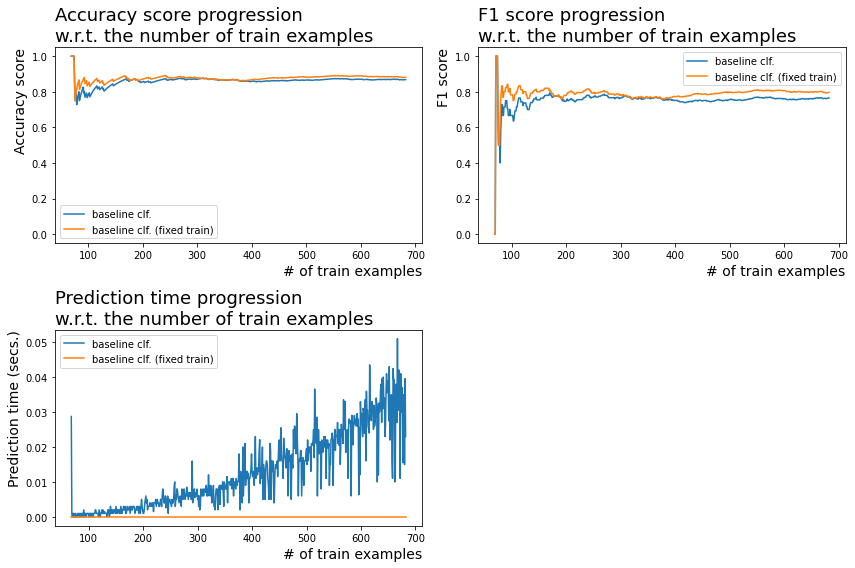

In [22]:

plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', loc='right', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()

In [23]:
sum(score_vals['accuracy_score'])/len(score_vals['accuracy_score'])*100

85.9914648578318

In [24]:
sum(score_vals['f1_score'])/len(score_vals['f1_score'])*100

75.27654744949736

In [25]:
#Let's dive in doing the ML model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,plot_roc_curve,classification_report

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2)

In [33]:
def check_model_results(model,X_train, X_test, y_train, y_test):
    y_pred = model.fit(X_train, y_train).predict(X_test)
    #Confussion Matrix on 
    print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
    # Accuracy
    print("Accuracy: ",accuracy_score(y_test, y_pred))
    # Recall
    print("Recall: ",recall_score(y_test, y_pred, average=None))
    # Precision
    print("Precision Score: ",precision_score(y_test, y_pred, average=None))
    print("Classification Report: \n",classification_report(y_test,y_pred))
    print(plot_roc_curve(model,X_test,y_test))

NaiveBayes
Confusion Matrix: 
 [[140   5]
 [  7  53]]
Accuracy:  0.9414634146341463
Recall:  [0.96551724 0.88333333]
Precision Score:  [0.95238095 0.9137931 ]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       145
           1       0.91      0.88      0.90        60

    accuracy                           0.94       205
   macro avg       0.93      0.92      0.93       205
weighted avg       0.94      0.94      0.94       205

RandomForest
Confusion Matrix: 
 [[142   3]
 [  5  55]]
Accuracy:  0.9609756097560975
Recall:  [0.97931034 0.91666667]
Precision Score:  [0.96598639 0.94827586]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       145
           1       0.95      0.92      0.93        60

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.

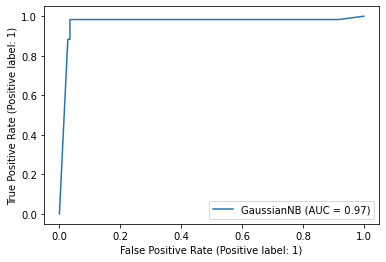

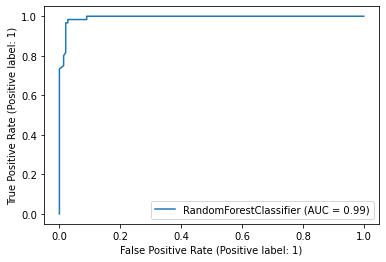

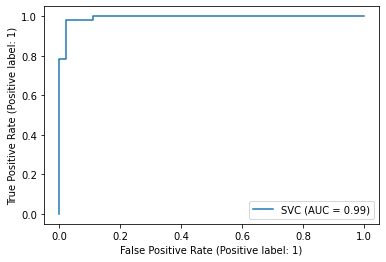

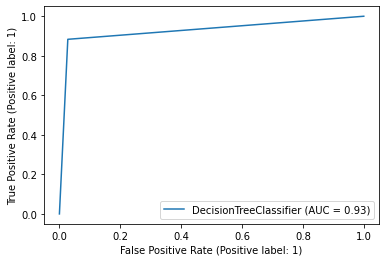

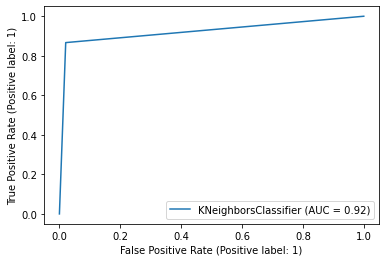

In [34]:
models =  {
    'NaiveBayes':GaussianNB(),
    'RandomForest':RandomForestClassifier(n_estimators = 110),
    'SupportVectorMachine':SVC(),
    'DecisionTree':DecisionTreeClassifier(),
    'KNeighboors':KNeighborsClassifier(1)
}
for key,model in models.items():
    print(key)
    check_model_results(model,X_train, X_test, y_train, y_test)